In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# get input data
df = pd.read_csv('./ratings_uvg.csv')
df

,ID,objects,rate,distance,timestamp
0,26,BlueSpin_GPCC_TRISOUP_r02_d200,1,0,2023-10-10-11:00:28+02:00
1,26,BlueSpin_GPCC_TRISOUP_r03_d200,3,0,2023-10-10-11:00:59+02:00
2,26,ReadyForWinter_GPCC_OCTREE_r03_d200,2,0,2023-10-10-11:01:28+02:00
3,26,BlueSpin_VPCC_r01_d200,1,0,2023-10-10-11:01:57+02:00
4,26,FlowerDance_VPCC_r03_d200,2,0,2023-10-10-11:02:30+02:00
...,...,...,...,...,...
2122,69,FlowerDance_GPCC_OCTREE_r03_d200,1,0,2023-11-03-11:05:05+01:00
2123,69,FlowerDance_GPCC_TRISOUP_r04_d200,5,0,2023-11-03-11:05:32+01:00
2124,69,BlueSpin_VPCC_r02_d200,2,0,2023-11-03-11:05:59+01:00
2125,69,ReadyForWinter_VPCC_r03_d200,4,0,2023-11-03-11:06:25+01:00


In [59]:
# create a new file for public
df_public = pd.read_csv('./ratings_uvg_modified.csv')
df_public[['object', 'codec', 'quality', 'distance']] = df_public['objects'].str.split('_', expand=True)
df_public = df_public.drop(columns=['objects', 'distance'], axis=1)
df_public = df_public[['ID', 'object', 'codec', 'quality', 'rate', 'timestamp']]
df_public.to_csv('./KLU_CWI_subjective_test_results.csv')

In [3]:
objects_rates = {}
for i in range(len(df["objects"])):
    metadata = df["objects"][i].split("_")
    object = metadata[0]
    codec = metadata[1]
    quality = metadata[-2]

    if len(metadata) == 5:
        codec = "{}_{}".format(metadata[1], metadata[2])
        
    if object in objects_rates:
        if codec in objects_rates[object]:
            if quality in objects_rates[object][codec]:
                objects_rates[object][codec][quality].append(df["rate"][i])
            else:
                objects_rates[object][codec][quality] = [df["rate"][i]]
        else:
            objects_rates[object][codec] = {
                quality: [df["rate"][i]]
            }
    else:
        objects_rates[object] = {
            codec: {
                quality: [df["rate"][i]]
            }
        }

print(objects_rates)

{'BlueSpin': {'GPCC_TRISOUP': {'r02': [1, 3, 2, 2, 3, 3, 2, 5, 1, 1, 3, 3, 1, 2, 2, 2, 3, 3, 4, 3, 3, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 1, 2, 2, 4, 2, 2, 2, 3], 'r03': [3, 3, 2, 3, 3, 4, 3, 5, 3, 3, 3, 4, 2, 3, 5, 4, 3, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 4, 4, 3, 4, 2], 'r01': [1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2], 'r04': [3, 4, 3, 2, 5, 4, 5, 5, 2, 3, 3, 4, 4, 3, 5, 4, 4, 5, 5, 5, 2, 2, 4, 5, 3, 4, 4, 4, 3, 5, 3, 4, 4, 2, 2, 3, 4, 3, 3, 3, 3]}, 'VPCC': {'r01': [1, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2], 'r05': [3, 4, 2, 3, 4, 4, 4, 5, 3, 3, 4, 3, 3, 4, 4, 2, 3, 4, 4, 3, 3, 3, 3, 5, 3, 3, 4, 3, 3, 4, 2, 3, 3, 2, 3, 4, 4, 2, 3, 4, 4], 'r03': [2, 3, 2, 2, 3, 3, 2, 4, 2, 2, 3, 4, 2, 3, 3, 2, 2, 5, 3, 2, 3, 2, 2, 4, 3, 3, 2, 3, 3, 2, 2, 3, 3, 1, 3, 3, 3, 2, 2, 3, 3], 'r02': [2, 3, 1, 2, 1, 2, 2, 2, 2, 

In [4]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

colors = ['#D7191C', '#2C7BB6', 'orange', 'purple']


In [6]:
def drawBoxPlotV2(data_groups, ouputPath, title, x_labels, legends, x_title, y_title):
    width       = 1/len(x_labels*2)
    xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(data_groups[0])) ]

    # symbol      = 'r+'
    ymin        = 0 #min ( [ val  for dg in data_groups  for data in dg for val in data ] )
    ymax        = 5 # max ( [ val  for dg in data_groups  for data in dg for val in data ])

    plt.figure(figsize=(12, 5))

    ax = plt.gca()
    ax.set_ylim(ymin,ymax)
    ax.grid(True, linestyle='dotted')
    ax.set_axisbelow(True)

    plt.xlabel(x_title,fontsize=25)
    plt.ylabel(y_title,fontsize=25)

    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

    space = len(data_groups)/2

    # --- Offset the positions per group:

    group_positions = []
    for num, dg in enumerate(data_groups):    
        _off = (0 - space + (0.5+num))
        # print(_off)
        group_positions.append([x+_off*(width+0.01) for x in xlocations])

    bp = []
    for dg, pos, c in zip(data_groups, group_positions, colors):
        bp.append(ax.boxplot(dg, 
                    labels=['']*len(x_labels),
                    positions=pos, 
                    widths=width, 
                    boxprops=dict(facecolor=c),
                    medianprops=dict(color='black'),
                    patch_artist=True,
                    )
        )
    data_labels = [bp[i]["boxes"][0] for i in range(len(bp))]
    plt.legend(data_labels, legends,ncol=len(data_groups), bbox_to_anchor=(0.95, 1.2))
    ax.set_xticks( xlocations )
    ax.set_xticklabels( x_labels, rotation=0 )

    plt.tight_layout()
    plt.savefig("{}/{}_updated_legend.pdf".format(ouputPath, title))
    # plt.show()

    for i in range(len(x_labels)):
        print("{}_{}: avg={}, median={}, max={}, min={}, std={}".format(x_labels[i], legends[0], np.average(data_groups[0][i]), np.median(data_groups[0][i]), np.max(data_groups[0][i]), np.min(data_groups[0][i]), np.std(data_groups[0][i])))
        print("{}_{}: avg={}, median={}, max={}, min={}, std={}".format(x_labels[i], legends[1], np.average(data_groups[1][i]), np.median(data_groups[1][i]), np.max(data_groups[1][i]), np.min(data_groups[1][i]), np.std(data_groups[1][i])))
        print("{}_{}: avg={}, median={}, max={}, min={}, std={}".format(x_labels[i], legends[3], np.average(data_groups[3][i]), np.median(data_groups[3][i]), np.max(data_groups[3][i]), np.min(data_groups[3][i]), np.std(data_groups[3][i])))


In [7]:
# constants

# videos
blueSpin = "BlueSpin"
readyForWinter = "ReadyForWinter"
flowerDance = "FlowerDance"
casualSquat = "CasualSquat"

# qualities
r1 = "r01"
r2 = "r02"
r3 = "r03"
r4 = "r04"
r5 = "r05"
raw = "raw"

Q1 = "Q1"
Q2 = "Q2"
Q3 = "Q3"
Q4 = "Q4"
Q5 = "Q5"
Q0 = "Raw"

# codecs
g_trisoup = 'GPCC_TRISOUP'
g_octree = 'GPCC_OCTREE'
v_ = 'VPCC'

## MMSys - Subjective test results

VPCC
[[[1, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2], [2, 3, 1, 2, 1, 2, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 2, 4, 2, 2, 2, 1, 2, 2, 3, 3, 2, 2, 2, 3, 1, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2], [2, 3, 2, 2, 3, 3, 2, 4, 2, 2, 3, 4, 2, 3, 3, 2, 2, 5, 3, 2, 3, 2, 2, 4, 3, 3, 2, 3, 3, 2, 2, 3, 3, 1, 3, 3, 3, 2, 2, 3, 3], [3, 4, 2, 2, 5, 3, 4, 5, 3, 4, 3, 4, 3, 3, 5, 1, 3, 4, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 3, 2, 3, 3, 3, 3, 2, 3, 4], [3, 4, 2, 3, 4, 4, 4, 5, 3, 3, 4, 3, 3, 4, 4, 2, 3, 4, 4, 3, 3, 3, 3, 5, 3, 3, 4, 3, 3, 4, 2, 3, 3, 2, 3, 4, 4, 2, 3, 4, 4], [4, 4, 3, 3, 4, 5, 5, 4, 4, 4, 4, 5, 5, 5, 5, 4, 5, 5, 4, 4, 3, 3, 5, 5, 4, 4, 4, 4, 5, 3, 4, 4, 3, 5, 4, 5, 3, 4, 5, 4]], [[1, 2, 2, 1, 2, 3, 1, 2, 1, 1, 2, 2, 1, 3, 1, 1, 1, 2, 3, 1, 3, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 3, 1, 1, 1, 2], [2, 3, 1, 2, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 3, 2, 3, 2, 1, 4, 2, 2, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 1, 4, 2, 1, 2

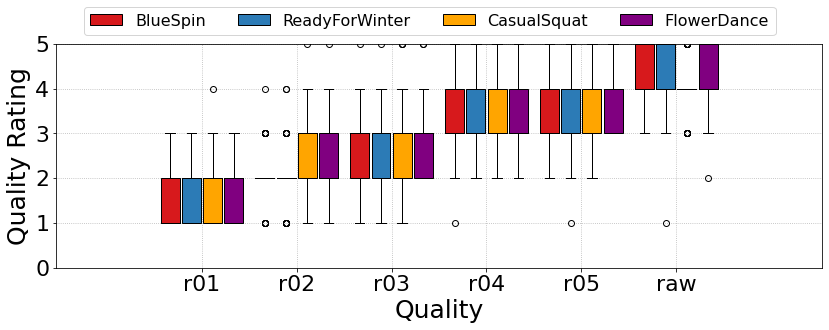

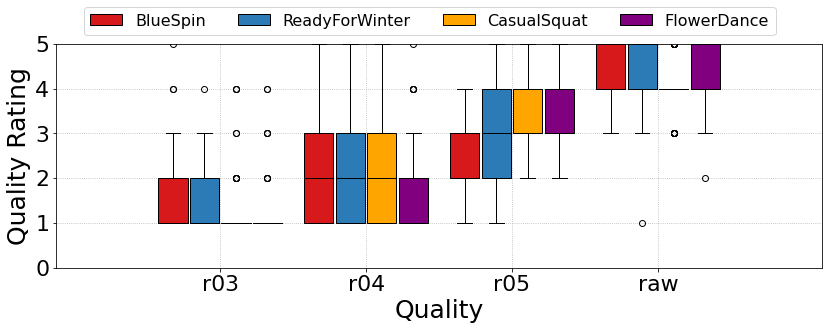

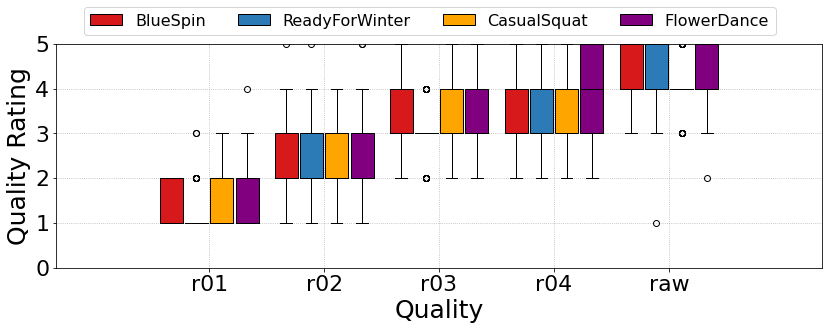

In [8]:
plt.rcParams.update({'font.size': 16})
q1=r1
q2=r2
q3=r3
q4=r4
q5=r5
q0 =raw

codecs = [v_, g_octree, g_trisoup]
videos = [blueSpin, readyForWinter, casualSquat, flowerDance]


for codec in codecs:
    print(codec)
    title = "task1_constant_" + codec 

    qualities = [q1, q2, q3, q4, q5]
    if codec == g_octree:
        qualities = [q3, q4, q5]
    if codec == g_trisoup:
        qualities = [q1, q2, q3, q4]

    data = []
    for video in videos:
        data.append([])
        for q in qualities:
            data[-1].append(objects_rates[video][codec][q])
        data[-1].append(objects_rates[video][v_][q0])

    print(data)

    x = qualities
    x.append(q0)
    print(x)
    outputPath = "./"
    drawBoxPlotV2(data, outputPath, title, x, videos, "Quality", "Quality Rating")

# Radar plot

In [71]:
colors = ['#D7191C', '#2C7BB6', 'orange', 'purple']

In [72]:
def plot_radar(categories, traces, names, outputPath, title):
    fig = go.Figure()

    for i in range(len(traces)):
        fig.add_trace(go.Scatterpolar(
            r=traces[i],
            theta=categories,
            fill='toself',
            name=names[i]
        ))

    fig.update_layout(
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=[1, 10]
        )),
    showlegend=True
    )

    fig.show()
    plt.tight_layout()
    plt.savefig("{}/{}.pdf".format(outputPath, title))

In [9]:
plt.style.use('ggplot')
import matplotlib as mpl

plt.rcParams.update({'font.size': 22})

# COLOR = "black"
# mpl.rcParams['text.color'] = COLOR
# mpl.rcParams['axes.labelcolor'] = COLOR
# mpl.rcParams['xtick.color'] = COLOR
# mpl.rcParams['ytick.color'] = COLOR


def plot_radar_v2(categories, traces, names, outputPath, title, x_labels):
    angles=np.linspace(0,2*np.pi,len(categories), endpoint=False)

    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(polar=True)

    categories += categories[:1]
    angles = np.append(angles,angles[:1])

    # x_labels += x_labels[:1]

    print("x_labels: {}. traces: {}. colors: {}. names: {}".format(x_labels, traces, colors, names))
    for i in range(len(traces)):

        traces[i] += traces[i][:1]

        ax.plot(angles,traces[i], 'o-', color=colors[i], linewidth=2, label=names[i])
        ax.fill(angles, traces[i], alpha=0.25, color=colors[i])
        print("{}".format(traces[i]))

    ax.set_thetagrids(angles * 180/np.pi, x_labels)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)


    plt.grid(True)

    fig.show()
    # plt.legend(bbox_to_anchor=(1.1,0.6))
    plt.legend(ncol=2,bbox_to_anchor=(1.1,1.25))
    plt.tight_layout()
    plt.savefig("{}/{}.pdf".format(outputPath, title))


In [15]:
videos = [blueSpin, readyForWinter, casualSquat, flowerDance]


codecs = [v_, g_octree, g_trisoup]
videos = [blueSpin, readyForWinter, casualSquat, flowerDance]


for codec in codecs:
    print(codec)
    title = "task1_constant_" + codec 

    qualities = [q1, q2, q3, q4, q5]
    if codec == g_octree:
        qualities = [q3, q4, q5]
    if codec == g_trisoup:
        qualities = [q1, q2, q3, q4]

    categories = qualities
    x_labels = qualities

    traces = [
        [np.average(objects_rates[video][codec][q]) for q in categories] for video in videos
    ]

    print(traces)

    title="quality_radar_"
    outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/2_dataset/results"
    plot_radar_v2(categories, traces, videos, outputPath, title, x_labels)


VPCC


NameError: name 'q1' is not defined

# ANOVA

In [8]:
import scipy.stats as stats

In [9]:
# s = pd.Series([objects_rates[video1][q1][d500],
#      objects_rates[video1][q2][d500],
#      objects_rates[video1][q3][d500]],
#      index=[q1,q2,q3])
     
# df = pd.DataFrame(s.values.tolist(), index=s.index).transpose()
# df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=[q1,q2,q3])
# df_melt.columns = ['sequence', 'qualities', 'value']
# # print(df_melt)

# for video in videos:
#      # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
#      fvalue, pvalue = stats.f_oneway(objects_rates[video][q1][d500],
#                                    objects_rates[video][q2][d500],
#                                    objects_rates[video][q3][d500])
#      print(video, fvalue, pvalue)

In [10]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(qualities)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

NameError: name 'df_melt' is not defined

In [ ]:
codec = v_
for video in videos:
     # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
     fvalue, pvalue = stats.f_oneway(objects_rates[video][codec][q1],
                                   objects_rates[video][codec][q2],
                                   objects_rates[video][codec][q3],
                                   objects_rates[video][codec][q4],
                                   objects_rates[video][codec][q5])
     print(video, fvalue, pvalue)

BlueSpin 50.04593477262289 3.844336708680866e-29
ReadyForWinter 49.34118722279623 8.493806433939656e-29
CasualSquat 25.97979892891736 2.4524340167319035e-17
FlowerDance 44.49894189247763 1.1788152599520107e-26


In [ ]:
codec = g_octree

for video in videos:
     # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
     fvalue, pvalue = stats.f_oneway(objects_rates[video][codec][q3],
                                   objects_rates[video][codec][q4],
                                   objects_rates[video][codec][q5])
     print(video, fvalue, pvalue)

BlueSpin 12.853333333333332 8.75204185874357e-06
ReadyForWinter 23.31911593640945 2.7822479546515937e-09
CasualSquat 58.76427829698857 1.6140797315403334e-18
FlowerDance 44.61468721668178 3.26223594222468e-15


In [ ]:
codec = g_trisoup

for video in videos:
     # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
     fvalue, pvalue = stats.f_oneway(objects_rates[video][codec][q1],
                                   objects_rates[video][codec][q2],
                                   objects_rates[video][codec][q3],
                                   objects_rates[video][codec][q4])
     print(video, fvalue, pvalue)

BlueSpin 60.831798649478195 2.684585724002455e-26
ReadyForWinter 64.13312956359316 2.7772254872186602e-27
CasualSquat 79.04202279202278 2.0472813730755486e-31
FlowerDance 74.11004541707281 4.864916770894533e-30


# Tukey's HSD (deprecated)

In [11]:
# from bioinfokit.analys import stat

In [12]:
# # perform multiple pairwise comparison (Tukey's HSD)
# # unequal sample size data, tukey_hsd uses Tukey-Kramer test
# res = stat()
# res.tukey_hsd(df=df_melt, res_var='value', xfac_var='qualities', anova_model='value ~ C(qualities)')
# res.tukey_summary

# Tukey's HSD

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for codec in codecs:
    qualities = [q1, q2, q3, q4, q5]
    if codec == g_octree:
        qualities = [q3, q4, q5]
    if codec == g_trisoup:
        qualities = [q1, q2, q3, q4]


    print('======== {} ========'.format(codec))
    for video in videos:
        print("\t\t====== {} ======".format(video))
        s = pd.Series( [objects_rates[video][codec][q] for q in qualities],
        index=qualities)
        
        df = pd.DataFrame(s.values.tolist(), index=s.index).transpose()
        df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=qualities)
        df_melt.columns = ['sequence', 'qualities', 'value']

        # ANOVA: Ordinary Least Squares (OLS) model
        model = ols('value ~ C(qualities)', data=df_melt).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(anova_table)

        # Tukey's HSD
        res = stat()
        res.tukey_hsd(df=df_melt, res_var='value', xfac_var='qualities', anova_model='value ~ C(qualities)')
        print(res.tukey_summary)

NameError: name 'codecs' is not defined

# T-test

In [103]:
from scipy.stats import ttest_ind
import itertools

In [125]:
for codec in codecs:
    print('======== {} ========'.format(codec))
    for video in videos:
        qualities = [q1, q2, q3, q4, q5]
        if codec == g_octree:
            qualities = [q3, q4, q5]
        if codec == g_trisoup:
            qualities = [q1, q2, q3, q4]
        
        all_combinations = itertools.combinations(qualities, 2)

        print('\n*********** {} *********'.format(video))
        for combination in all_combinations:
            t_stat, p_value = ttest_ind(objects_rates[video][codec][combination[0]], objects_rates[video][codec][combination[1]])
            print("\t {}".format(combination))
            print("\t\tT-statistic value: ", t_stat)  
            print("\t\tP-Value: ", p_value)


======== VPCC ========

*********** BlueSpin *********
	 ('r01', 'r02')
		T-statistic value:  -4.736113304257959
		P-Value:  9.289664202512259e-06
	 ('r01', 'r03')
		T-statistic value:  -8.084520834544433
		P-Value:  5.523420584025934e-12
	 ('r01', 'r04')
		T-statistic value:  -11.410886614690959
		P-Value:  1.8511816418189125e-18
	 ('r01', 'r05')
		T-statistic value:  -12.611852501889313
		P-Value:  1.0430246717584555e-20
	 ('r02', 'r03')
		T-statistic value:  -3.5553315341612906
		P-Value:  0.0006373289271021503
	 ('r02', 'r04')
		T-statistic value:  -7.016464154456232
		P-Value:  6.596879964504595e-10
	 ('r02', 'r05')
		T-statistic value:  -7.8835612279228595
		P-Value:  1.3670178061911818e-11
	 ('r03', 'r04')
		T-statistic value:  -3.448685956125485
		P-Value:  0.0009013635991136755
	 ('r03', 'r05')
		T-statistic value:  -4.058397249567137
		P-Value:  0.0001142636618857904
	 ('r04', 'r05')
		T-statistic value:  -0.4138423147350588
		P-Value:  0.6800969784704658

*********** ReadyFo

# User-centric Analysis

In [16]:
real_object_assessment = "How would you describe the general experience? [I felt the objects were part of the real environment]"
experience_assessment = "How often have you used an AR headset?"
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/2_dataset/results"

In [17]:
# map user and response
# get response and ratings data
df_ratings = pd.read_csv('./ratings_uvg.csv')
df_survey = pd.read_csv('/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/2_dataset/responses_processed.csv')
# df_survey[[real_object_assessment, experience_assessment]]
df_survey

,Timestamp,What is your gender?,What is your age group?,What is your occupation?,How often have you used an AR headset?,Do you wear lenses or glasses in the experiment session to correct your vision?,Which number do you see below?,Which number do you see below?.1,Which number do you see below?.2,Which number do you see below?.3,...,After the assignment I feel... [The fullness of your head],After the assignment I feel... [Dizzy with your eyes open],After the assignment I feel... [Dizzy with your eyes closed],After the assignment I feel... [Vertigo],After the assignment I feel... [Stomach awareness (nausea)],How would you describe the general experience? [I felt the objects were part of the real environment],How would you describe the general experience? [The quality of the image of the glasses was optimal],How would you describe the general experience? [The glasses were comfortable],Do you think the experiment was easy or difficult?,Would you like to add more feedback?
0,2023/10/10 10:28:43 AM GMT+1,Female,25 - 34,Student,First time,No,42,26,73,5,...,Slight,None,None,None,None,Disagree,Neutral,Neutral,Fair,NaN
1,2023/10/10 1:03:40 PM GMT+1,Male,18 - 24,Student,First time,No,42,26,73,5,...,Slight,Moderate,Slight,Moderate,None,Neutral,Agree,Neutral,Fair,"at first the lenses were hard to adjust, so if..."
2,2023/10/10 2:12:29 PM GMT+1,Female,25 - 34,Student,First time,No,42,26,73,5,...,None,None,None,None,None,Agree,Disagree,Agree,Easy,NaN
3,2023/10/11 8:43:55 AM GMT+1,Male,25 - 34,Student,5 to 20 times,No,42,28,13,81,...,None,None,None,None,None,Disagree,Neutral,Agree,Easy,NaN
4,2023/10/11 10:12:19 AM GMT+1,Male,18 - 24,Student,5 to 20 times,No,42,26,73,5,...,Slight,None,None,None,None,Agree,Agree,Agree,Easy,NaN
5,2023/10/11 2:15:57 PM GMT+1,Male,25 - 34,Student,More than 20 times,Yes,42,26,73,5,...,None,None,None,None,None,Strongly disagree,Agree,Agree,Very easy,NaN
6,2023/10/12 12:51:25 PM GMT+1,Female,18 - 24,Student,First time,Yes,42,26,73,5,...,None,Slight,None,None,None,Strongly disagree,Agree,Disagree,Fair,NaN
7,2023/10/12 1:56:08 PM GMT+1,Female,35 - 44,NaN,Fewer than 5 times,No,42,26,73,5,...,None,None,None,None,None,Strongly agree,Strongly agree,Strongly agree,Easy,"The length of videos should be shorter, 10-12 ..."
8,2023/10/12 2:45:50 PM GMT+1,Female,35 - 44,Uni Staff,First time,Yes,42,26,73,5,...,None,None,None,None,None,Disagree,Neutral,Agree,Easy,I think need some music for the room to make m...
9,2023/10/13 10:12:47 AM GMT+1,Male,18 - 24,NaN,Fewer than 5 times,No,42,26,23,5,...,None,None,None,None,None,Neutral,Neutral,Agree,Easy,None


In [18]:
df_survey.keys()

Index(['Timestamp', 'What is your gender?', 'What is your age group?',
       'What is your occupation?', 'How often have you used an AR headset?',
       'Do you wear lenses or glasses in the experiment session to correct your vision?',
       'Which number do you see below?', 'Which number do you see below?.1',
       'Which number do you see below?.2', 'Which number do you see below?.3',
       'Before the assignment I feel... [General discomfort]',
       'Before the assignment I feel... [Fatigue]',
       'Before the assignment I feel... [Headache]',
       'Before the assignment I feel... [Eye strain]',
       'Before the assignment I feel... [The fullness of your head]',
       'Before the assignment I feel... [Dizzy with your eyes open]',
       'Before the assignment I feel... [Dizzy with your eyes closed]',
       'Before the assignment I feel... [Vertigo]',
       'Before the assignment I feel... [Stomach awareness (nausea)]',
       'After the assignment I feel... [General 

In [41]:
keys_map = {
    'before_discomfort': 'Before the assignment I feel... [General discomfort]',
    'before_fatigue': 'Before the assignment I feel... [Fatigue]',
    'before_headache': 'Before the assignment I feel... [Headache]',
    'before_eye_strain': 'Before the assignment I feel... [Eye strain]',
    'before_full_head': 'Before the assignment I feel... [The fullness of your head]',
    'before_dizzy_open_eyes': 'Before the assignment I feel... [Dizzy with your eyes open]',
    'before_dizzy_closed_eyes': 'Before the assignment I feel... [Dizzy with your eyes closed]',
    'before_vertigo': 'Before the assignment I feel... [Vertigo]',
    'before_nausea': 'Before the assignment I feel... [Stomach awareness (nausea)]',
    
    'after_discomfort': 'After the assignment I feel... [General discomfort]',
    'after_fatigue': 'After the assignment I feel... [Fatigue]',
    'after_headache': 'After the assignment I feel... [Headache]',
    'after_eye_strain': 'After the assignment I feel... [Eye strain]',
    'after_full_head': 'After the assignment I feel... [The fullness of your head]',
    'after_dizzy_open_eyes': 'After the assignment I feel... [Dizzy with your eyes open]',
    'after_dizzy_closed_eyes': 'After the assignment I feel... [Dizzy with your eyes closed]',
    'after_vertigo': 'After the assignment I feel... [Vertigo]',
    'after_nausea': 'After the assignment I feel... [Stomach awareness (nausea)]',

    'immersion': 'How would you describe the general experience? [I felt the objects were part of the real environment]',
    'frequency': 'How often have you used an AR headset?'
}


In [20]:
import plot_likert as plk
import pandas as pd
import numpy as np

In [25]:
plt.rcParams.update({'font.size': 14})
scale = \
    ['None',
     'Slight',
     'Moderate',
     'Severe']

times = ['before', 'after']

for time in times:
    data = df_survey[[keys_map[time + '_discomfort'], keys_map[time + '_fatigue'], keys_map[time + '_headache'],
                            keys_map[time + '_eye_strain'], keys_map[time + '_full_head'], keys_map[time + '_dizzy_open_eyes'],
                            keys_map[time + '_dizzy_closed_eyes'], keys_map[time + '_vertigo'], keys_map[time + '_nausea']]].copy()
    data.columns = ['General Discomfort', 'Fatigue', 'Headache',
                        'Eye Strain', 'Full Head', 'Dizzy with Eyes Open',
                        'Dizzy with Eyes Closed', 'Vertigo', 'Nausea']
    
    print(data)

    # axes = plk.plot_likert(data_likert, scale, plot_percentage=True, bar_labels=True,
    #                     bar_labels_color="white",figsize=(12,4))
    # plt.tight_layout()
    # plt.savefig(outputPath + '/cybersickness_{}.pdf'.format(time))

   General Discomfort Fatigue Headache Eye Strain Full Head  \
0                None    None     None     Slight    Slight   
1                None    None     None       None    Slight   
2                None    None     None       None      None   
3                None    None     None       None      None   
4                None    None     None       None    Slight   
5                None    None     None       None      None   
6                None    None     None       None      None   
7                None    None     None       None      None   
8                None    None     None       None      None   
9                None    None     None       None      None   
10               None    None     None       None      None   
11               None    None     None       None      None   
12               None    None     None     Slight      None   
13               None  Slight   Slight     Slight      None   
14               None    None     None       None      

In [143]:
print(data_likert)
ven_sets = {}

for column in data_likert.keys():
    ven_sets[column] = set()
    for i in np.arange(data_likert.shape[0]):
            ven_sets[column].add(i)

print(ven_sets)

   General Discomfort   Fatigue  Headache Eye Strain Full Head  \
0              Slight    Slight      None     Slight    Slight   
1              Slight    Slight    Slight   Moderate    Slight   
2                None      None      None       None      None   
3              Slight    Slight      None     Slight      None   
4                None      None      None       None    Slight   
5                None      None      None       None      None   
6              Slight      None    Slight   Moderate      None   
7                None      None      None       None      None   
8                None      None      None       None      None   
9              Slight      None      None       None      None   
10               None      None      None       None      None   
11             Slight      None      None       None      None   
12             Slight    Slight  Moderate   Moderate      None   
13             Slight  Moderate  Moderate   Moderate    Slight   
14        

In [145]:
# %matplotlib inline
# from venn import venn

# venn(ven_sets,figsize=(9,6),legend_loc='best')
# plt.savefig(outputPath + "/cybersickness_venn.pdf")

In [147]:
data_presence = df_survey[keys_map['presence']].value_counts()

cols_presence = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']
data_presence = data_presence[cols_presence]
data_presence

Strongly disagree     6
Disagree              7
Neutral              11
Agree                15
Strongly agree        2
Name: How would you describe the general experience? [I felt the objects were part of the real environment], dtype: int64

<AxesSubplot:ylabel='# of responses'>

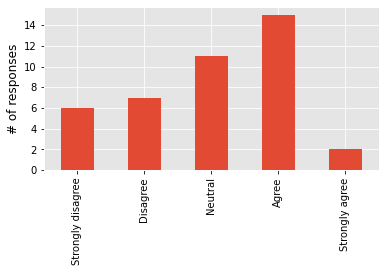

In [148]:
data_presence.plot(kind='bar', figsize=(6,3), ylabel= '# of responses')

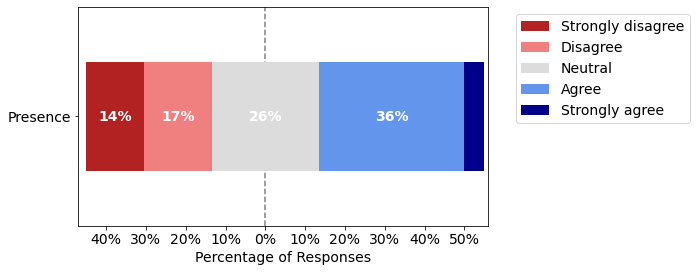

In [23]:
plt.rcParams.update({'font.size': 14})
data_presence = df_survey[[keys_map['presence']]].copy()
data_presence.columns = ['Presence']

scale = \
    ['Strongly disagree',
     'Disagree',
     'Neutral',
     'Agree',
     'Strongly agree']

axes = plk.plot_likert(data_presence, scale, plot_percentage=True, bar_labels=True,
                       bar_labels_color="white",figsize=(10,4))
plt.tight_layout()
plt.savefig(outputPath + '/presence.pdf')

In [27]:
frequencies = ["First time", "Fewer than 5 times", "5 to 20 times", "More than 20 times", "Every day"]
real_feeling = ["Strongly agree", "Agree", "Neutral", "Disagree", "Strongly disagree"]

real_object_assessment_response = {}
for key in real_feeling:
    real_object_assessment_response[key] = {}
    for key_1 in frequencies:
        real_object_assessment_response[key][key_1] = 0

for i in range(len(df_survey[experience_assessment])):
    real_object_assessment_response[df_survey[real_object_assessment][i]][df_survey[experience_assessment][i]] += 1 

real_object_assessment_response

{'Strongly agree': {'First time': 1,
  'Fewer than 5 times': 1,
  '5 to 20 times': 0,
  'More than 20 times': 0,
  'Every day': 0},
 'Agree': {'First time': 7,
  'Fewer than 5 times': 3,
  '5 to 20 times': 5,
  'More than 20 times': 0,
  'Every day': 0},
 'Neutral': {'First time': 3,
  'Fewer than 5 times': 8,
  '5 to 20 times': 0,
  'More than 20 times': 0,
  'Every day': 0},
 'Disagree': {'First time': 4,
  'Fewer than 5 times': 2,
  '5 to 20 times': 1,
  'More than 20 times': 0,
  'Every day': 0},
 'Strongly disagree': {'First time': 2,
  'Fewer than 5 times': 2,
  '5 to 20 times': 1,
  'More than 20 times': 1,
  'Every day': 0}}

In [42]:
data_frequency = df_survey[[keys_map['frequency'], keys_map['immersion']]]
data_frequency.columns = ['Frequency', 'Immersion level']
data_frequency

,Frequency,Immersion level
0,First time,Disagree
1,First time,Neutral
2,First time,Agree
3,5 to 20 times,Disagree
4,5 to 20 times,Agree
5,More than 20 times,Strongly disagree
6,First time,Strongly disagree
7,Fewer than 5 times,Strongly agree
8,First time,Disagree
9,Fewer than 5 times,Neutral


In [44]:
frequency_series = data_frequency.groupby(['Frequency', 'Immersion level']).size()
frequency_series = frequency_series.to_frame(name='Counts').reset_index()
frequency_series

,Frequency,Immersion level,Counts
0,5 to 20 times,Agree,5
1,5 to 20 times,Disagree,1
2,5 to 20 times,Strongly disagree,1
3,Fewer than 5 times,Agree,3
4,Fewer than 5 times,Disagree,2
5,Fewer than 5 times,Neutral,8
6,Fewer than 5 times,Strongly agree,1
7,Fewer than 5 times,Strongly disagree,2
8,First time,Agree,7
9,First time,Disagree,4


In [45]:
pivot = frequency_series.pivot(index=['Frequency'], columns=['Immersion level'], values='Counts')
pivot

Immersion level,Agree,Disagree,Neutral,Strongly agree,Strongly disagree
Frequency,,,,,
5 to 20 times,5.0,1.0,NaN,NaN,1.0
Fewer than 5 times,3.0,2.0,8.0,1.0,2.0
First time,7.0,4.0,3.0,1.0,2.0
More than 20 times,NaN,NaN,NaN,NaN,1.0


In [46]:
pivot = pivot[real_feeling].reindex(frequencies).fillna(0)
pivot

Immersion level,Strongly agree,Agree,Neutral,Disagree,Strongly disagree
Frequency,,,,,
First time,1.0,7.0,3.0,4.0,2.0
Fewer than 5 times,1.0,3.0,8.0,2.0,2.0
5 to 20 times,0.0,5.0,0.0,1.0,1.0
More than 20 times,0.0,0.0,0.0,0.0,1.0
Every day,0.0,0.0,0.0,0.0,0.0


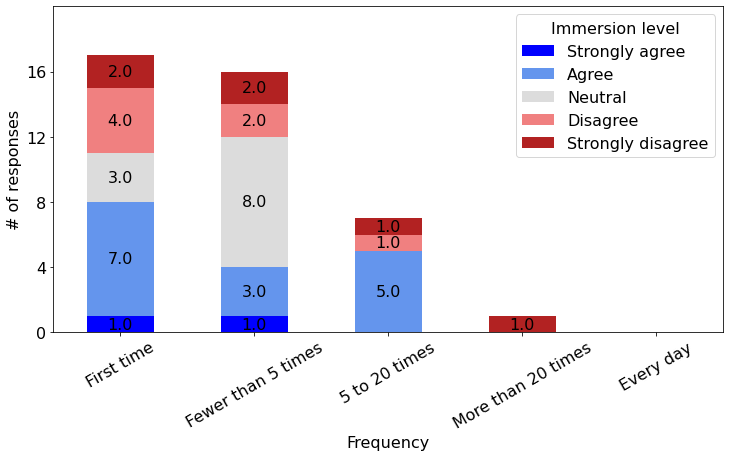

In [47]:
plt.rcParams.update({'font.size': 16})

plot_likert_colors = [
    "blue",
     "cornflowerblue",
    "gainsboro",
    "lightcoral",
    "firebrick",
]

ax = pivot.plot.bar(stacked=True, figsize=(12,6), color=plot_likert_colors)
ax.set_xticklabels(frequencies, rotation=30)
ax.set_ylabel('# of responses')
ax.set_ylim([0,20])
ax.set_yticks(np.arange(0,20,4))

# iterate through each container
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')
plt.savefig(outputPath + '/presence_frequency.pdf')

In [63]:
data_frequency

,Frequency,Immersion level
0,First time,Disagree
1,First time,Neutral
2,First time,Agree
3,5 to 20 times,Disagree
4,5 to 20 times,Agree
5,More than 20 times,Strongly disagree
6,First time,Strongly disagree
7,Fewer than 5 times,Strongly agree
8,First time,Disagree
9,Fewer than 5 times,Neutral


None
                    Immersion level
Frequency                          
5 to 20 times                     7
Fewer than 5 times               16
First time                       17
More than 20 times                1
                    Immersion level
Frequency                          
First time                       17
Fewer than 5 times               16
5 to 20 times                     7
More than 20 times                1


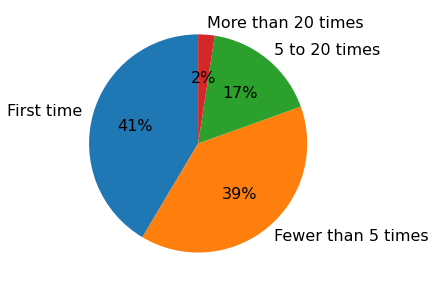

In [64]:
frequency_statics_ = data_frequency.groupby(['Frequency']).count()
new_fr = frequencies.copy()
print(new_fr.remove('Every day'))
print(frequency_statics_)

frequency_statics = frequency_statics_.reindex(new_fr).fillna(0)
print(frequency_statics)

def absolute_value(val):
    a = np.round(val/100.0*frequency_statics['Immersion level'].sum(), 0)
    return a

plt.figure(figsize=(6,6))
plt.pie(frequency_statics['Immersion level'],labels=new_fr, startangle=90, autopct='%1d%%')
plt.tight_layout()
plt.savefig(outputPath + '/frequency.pdf')

# calculate contrast
https://stackoverflow.com/questions/58821130/how-to-calculate-the-contrast-of-an-image

In [83]:
import cv2
import numpy as np

imgs = ['loot_vox10_1000.png', 'longdress_vox10_1051.png', 'redandblack_vox10_1450.png', 'soldier_vox10_0536.png']
def getContrastFromFiles(root, img_names):
    contrasts = {}
    for img_name in img_names:
        img = cv2.imread(root + img_name)
        contrast = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        contrasts[img_name] = contrast.std()

    return contrasts


In [84]:
getContrastFromFiles('/Users/minhkstn/Downloads/', imgs)

{'loot_vox10_1000.png': 38.82098408271875,
 'longdress_vox10_1051.png': 43.70878281459569,
 'redandblack_vox10_1450.png': 31.080405616667218,
 'soldier_vox10_0536.png': 45.68914511849266}

In [81]:
import os
import cv2
import numpy as np

def getContrastFromFolder(path):
    contrasts = []
    for f in os.listdir(path):
        img = cv2.imread(path + f)
        img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        contrasts.append(img_cvt.std())
    print('{}: {}'.format(path, np.average(contrasts)))
    return np.average(contrasts)

In [85]:
getContrastFromFolder('/Users/minhkstn/Downloads/redandblack/')
getContrastFromFolder('/Users/minhkstn/Downloads/loot/')
getContrastFromFolder('/Users/minhkstn/Downloads/longdress/')
getContrastFromFolder('/Users/minhkstn/Downloads/soldier/')

/Users/minhkstn/Downloads/redandblack/: 29.612291597692455
/Users/minhkstn/Downloads/loot/: 38.80138272971711
/Users/minhkstn/Downloads/longdress/: 43.682672181441
/Users/minhkstn/Downloads/soldier/: 45.50615020265043


45.50615020265043